Enter From Currency e.g BTC, ETH(Default BTC): 
Enter To Currency e.g USD, BTC(Default USD): 
Enter History Limit MI for Minutely H for Hourly D for Daily M for Monthly Y for Yearly(Default Minutely): D
Enter Limit By default 10(for last 10 minutes/hours/days/months/years): 1
Enter Exchange (Default CCCAGG ): 


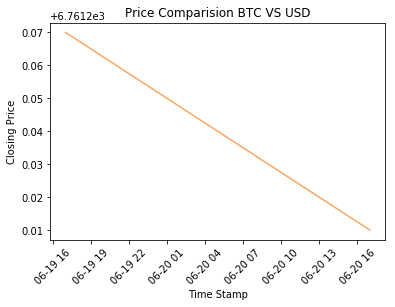

In [4]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


def get_pricehistory(from_currency,to_currency='USD',limit=10,interval=1,exchange='CCCAGG',hist_type='MI'):
    if hist_type =='MI':
        uri = "https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}&e={}"
        uri = uri.format(from_currency,to_currency,limit,interval,exchange)
    elif hist_type == 'H':
        uri = "https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}&e={}"
        uri = uri.format(from_currency,to_currency,limit,interval,exchange)
    elif hist_type == 'D':
        uri = "https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&e={}"
        uri = uri.format(from_currency,to_currency,limit,interval,exchange)
    elif hist_type == 'Y':
        uri = "https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&e={}"
        uri = uri.format(from_currency,to_currency,limit,interval,exchange)
    elif hist_type == 'M':
        uri = "https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&e={}"
        uri = uri.format(from_currency,to_currency,limit,interval,exchange)
    else:
        uri = "https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}&e={}"
        uri = uri.format(from_currency,to_currency,limit,interval,exchange)
    response = requests.get(uri)

    if response.status_code ==200:
        response_json = response.json()
    return response_json


def parse_response(response_json,graph_frequency):
    if response_json:
        df = pd.DataFrame(response_json['Data'])
        df['timestamp'] = [datetime.fromtimestamp(s) for s in df.time]
    #print (df)
    return df

def plot_graph(df,x_title,y_title,graph_title):
    fig = plt.figure()
    axs = plt.axes()
    axs.plot_date(df.timestamp,df.close,color='#f7a862', fmt='r-')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(graph_title)
    plt.setp(axs.get_xaxis().get_majorticklabels(), rotation=45)
    plt.show()






from_currency = input("Enter From Currency e.g BTC, ETH(Default BTC): ")
to_currency = input("Enter To Currency e.g USD, BTC(Default USD): ")
hist_type = input("Enter History Limit MI for Minutely H for Hourly D for Daily M for Monthly Y for Yearly(Default Minutely): ")
limit = input("Enter Limit By default 10(for last 10 minutes/hours/days/months/years): ")
#interval = input("Enter Interval By default 1(For every 1 minute/hour/day/year/month): ")
exchange = input("Enter Exchange (Default CCCAGG ): ")

if not from_currency:
    from_currency = 'BTC'
if not to_currency:
    to_currency = 'USD'
if not hist_type:
    hist_type = 'MI'
if not limit:
    limit = 10
if not exchange:
    exchange = 'CCCAGG'
if hist_type=='M':
    interval = 30
elif hist_type =='Y':
    if int(limit)>2000:
        limit = 2000
        interval = 30
    else:
        limit = int(limit)*12
        interval = 30
else:
    interval=1



price_hist = get_pricehistory(from_currency.upper(), to_currency.upper(), limit, interval, exchange.upper(),
                              hist_type.upper())
price_df = parse_response(price_hist,hist_type)

plot_graph(price_df, 'Time Stamp', 'Closing Price',
           'Price Comparision ' + from_currency.upper() + ' VS ' + to_currency.upper())
